# Question 5

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()
    
    # Calculate the histogram of the grayscale image
    hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0,256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Perform histogram equalization
    equalized_image = np.interp(gray_image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(gray_image.shape)
    
    return equalized_image


# Load the image
image = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Images/emma.jpg')

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Calculate histograms before and after equalization
original_hist, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])




## Reference Codes

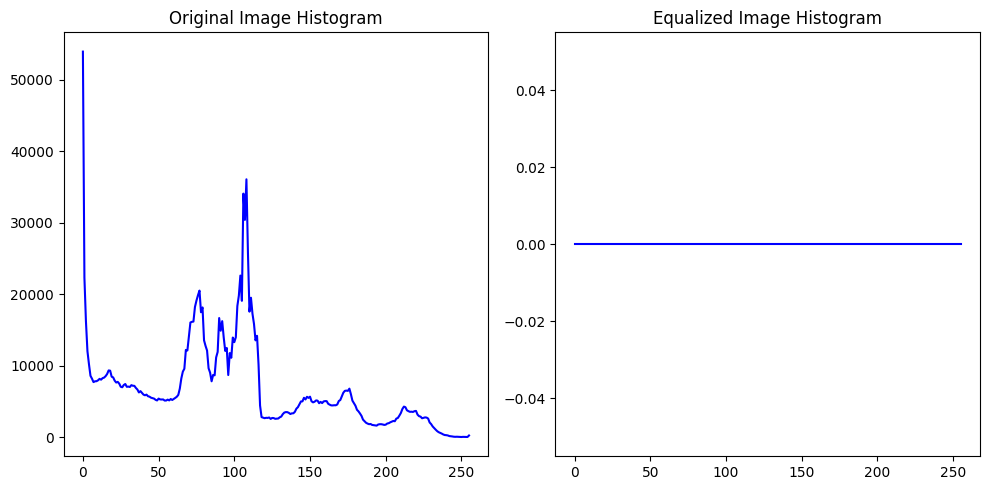

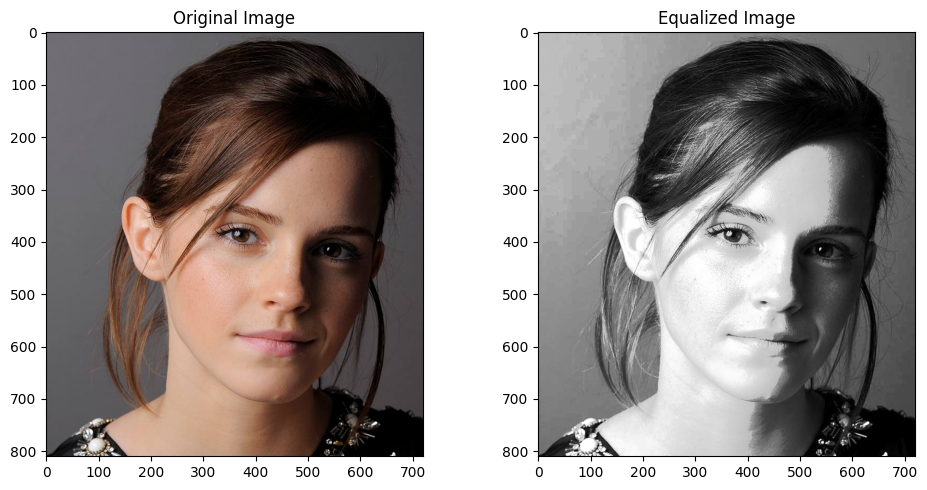

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()
    
    # Calculate the histogram of the grayscale image
    hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0,256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Perform histogram equalization
    equalized_image = np.interp(gray_image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(gray_image.shape)
    
    return equalized_image

# Load the image
image = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Images/emma.jpg')

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Calculate histograms before and after equalization
original_hist, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])

# Display histograms before and after equalization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title("Original Image Histogram")

plt.subplot(1, 2, 2)
plt.plot(equalized_hist, color='blue')
plt.title("Equalized Image Histogram")

plt.tight_layout()
plt.show()

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")

plt.tight_layout()
plt.show()


* The np.interp function is used to perform linear interpolation. In the context of histogram equalization, it's utilized to map the intensity values of the original image to their corresponding values in the equalized image.

* Here's a breakdown of how it works:

* np.interp(x, xp, fp) takes three arguments:

1. x: The input values that you want to interpolate.
2. xp: The x-coordinates of the data points (the intensity levels in this case).
3. fp: The y-coordinates of the data points (the cumulative distribution function values in this case).

* For each intensity value in the original image, np.interp finds the corresponding position (x) in the cumulative distribution function (cdf_normalized) and returns the interpolated value. This value becomes the new intensity value in the equalized image.